### Problem Statement

You are being provided with a not so efficient Data Set related to Air BNB House Price. We need you to create a Model with required Visualizations that may predict the House Prices. Also find out the Accuracy of your Model and Mean Absolute Error of the Predicted vs Actual Prices.

### Importing Libraries

Importing the Basic Libraries for Data Science.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style

### Importing the Data

In [3]:
file_path = 'Air_BNB_data.csv'

In [5]:
df = pd.read_csv(file_path)

C:\Users\AHSAN\AppData\Local\Temp\ipykernel_20412\2618208116.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


### Analyzing the DataFrame

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


In [9]:
df.describe()

,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,7.411100e+04,74108.000000,73908.000000,57389.000000,74019.000000,73980.000000,74111.000000
mean,1.126662e+07,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069
std,6.081735e+06,2.153603,0.582054,7.836556,0.852149,1.254142,0.717394
min,3.440000e+02,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,6.261964e+06,2.000000,1.000000,92.000000,1.000000,1.000000,4.317488
50%,1.225415e+07,2.000000,1.000000,96.000000,1.000000,1.000000,4.709530
75%,1.640226e+07,4.000000,1.000000,100.000000,1.000000,2.000000,5.220356
max,2.123090e+07,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402


### Pre-Processing

#### Dropping Irrelevant Features based on Human Instinct

In [11]:
df.drop('id',axis=1,inplace=True)

In [13]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [15]:
df.shape

(74111, 10)

#### Removing Duplicate Rows

In [17]:
df_2 = df.copy()

In [19]:
df_2.drop_duplicates(inplace=True)

In [21]:
df_2.shape

(54117, 10)

#### Finding How Many Type of Entries are there in Object Type Columns

In [23]:
for column in df_2.columns:
    if df_2[column].dtype == 'object':
        print(df_2[column].value_counts(dropna=False))
        print()

room_type
Entire home/apt    33854
Private room       18413
Shared room         1845
NaN                    5
Name: count, dtype: int64

cancellation_policy
strict      25213
flexible    14569
moderate    14327
NaN             8
Name: count, dtype: int64

cleaning_fee
True     40348
False    13765
NaN          4
Name: count, dtype: int64

instant_bookable
f    37838
t    16279
Name: count, dtype: int64



#### Removing the Object Type Column with Boolean Columns

In [25]:
df_3 = pd.get_dummies(df_2, columns=['room_type','cancellation_policy','cleaning_fee','instant_bookable'], drop_first=False)

In [27]:
df_3.shape

(54117, 16)

#### Removing Null Values

In [29]:
df_mean = df_3.copy()

In [31]:
df_median = df_3.copy()

In [33]:
df_mean.isnull().sum()

accommodates                        3
bathrooms                         195
review_scores_rating            10215
bedrooms                           92
beds                              125
log_price                           0
room_type_Entire home/apt           0
room_type_Private room              0
room_type_Shared room               0
cancellation_policy_flexible        0
cancellation_policy_moderate        0
cancellation_policy_strict          0
cleaning_fee_False                  0
cleaning_fee_True                   0
instant_bookable_f                  0
instant_bookable_t                  0
dtype: int64

In [35]:
df_median.isnull().sum()

accommodates                        3
bathrooms                         195
review_scores_rating            10215
bedrooms                           92
beds                              125
log_price                           0
room_type_Entire home/apt           0
room_type_Private room              0
room_type_Shared room               0
cancellation_policy_flexible        0
cancellation_policy_moderate        0
cancellation_policy_strict          0
cleaning_fee_False                  0
cleaning_fee_True                   0
instant_bookable_f                  0
instant_bookable_t                  0
dtype: int64

In [37]:
for col in df_mean.columns:
    if df_mean[col].dtype != 'object':
        mean = df_mean[col].mean()
        df_mean[col] = df_mean[col].fillna(mean)

In [39]:
for col in df_median.columns:
    if df_median[col].dtype != 'object':
        median = df_median[col].median()
        df_median[col] = df_median[col].fillna(median)

In [43]:
# df_mean.isnull().sum()

In [44]:
# df_median.isnull().sum()

Use KNN Algorithm to Impute!

In [41]:
from sklearn.impute import KNNImputer

In [43]:
imputer = KNNImputer(n_neighbors=5)

In [46]:
df_imputed = imputer.fit_transform(df_3)

In [52]:
df_knn = pd.DataFrame(data=df_imputed, columns=df_3.columns)

In [50]:
# df_knn.isnull().sum()

#### Outlier Treatment

In [54]:
df_mean.columns

Index(['accommodates', 'bathrooms', 'review_scores_rating', 'bedrooms', 'beds',
       'log_price', 'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'cancellation_policy_flexible',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cleaning_fee_False', 'cleaning_fee_True', 'instant_bookable_f',
       'instant_bookable_t'],
      dtype='object')

In [56]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54117 entries, 0 to 74110
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accommodates                  54117 non-null  float64
 1   bathrooms                     54117 non-null  float64
 2   review_scores_rating          54117 non-null  float64
 3   bedrooms                      54117 non-null  float64
 4   beds                          54117 non-null  float64
 5   log_price                     54117 non-null  float64
 6   room_type_Entire home/apt     54117 non-null  bool   
 7   room_type_Private room        54117 non-null  bool   
 8   room_type_Shared room         54117 non-null  bool   
 9   cancellation_policy_flexible  54117 non-null  bool   
 10  cancellation_policy_moderate  54117 non-null  bool   
 11  cancellation_policy_strict    54117 non-null  bool   
 12  cleaning_fee_False            54117 non-null  bool   
 13  cleani

In [58]:
features_with_outliers = df_knn.columns[0:6]

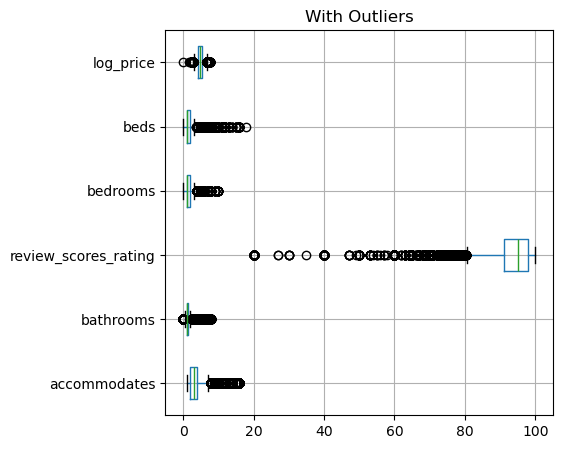

In [60]:
plt.figure(figsize=(5,5))
df_knn[features_with_outliers].boxplot(vert=0)
plt.title('With Outliers')
plt.show()

In [62]:
def remove_outliers(col):
    sorted(col)
    Q1, Q3 = np.percentile(col, [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [64]:
df_knn_o = df_knn.copy()

In [70]:
for column in df_knn_o[features_with_outliers]:
    lr, ur = remove_outliers(df_knn_o[column])
    df_knn_o[column] = np.where(df_knn_o[column]>ur, ur, df_knn_o[column])
    df_knn_o[column] = np.where(df_knn_o[column]<lr, lr, df_knn_o[column])

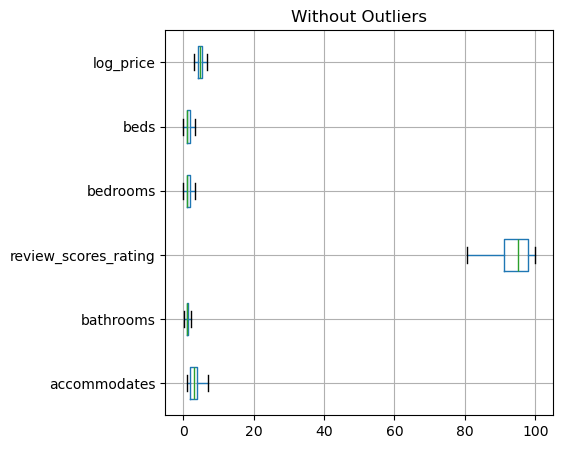

In [72]:
plt.figure(figsize=(5,5))
df_knn_o[features_with_outliers].boxplot(vert=0)
plt.title('Without Outliers')
plt.show()

### Saving the Data Set

In [74]:
df_knn.to_csv('df_knn.csv', index=False)

In [76]:
df_knn_o.to_csv('df_knn_o.csv',index=False)